Step 1: Import Necessary Modules

In [1]:
# Step 1: Import Necessary Modules
import sys
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate  # Import tabulate
import logging
sys.path.append('../scripts')

from preprocessing import DataProcessor

# Suppress warnings
warnings.filterwarnings("ignore")

# Configure logging to display messages in the notebook
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

Step 2: Set Up File Paths

In [3]:
train_path = '../src/Data/train.csv'
test_path = '../src/Data/test.csv'
store_path = '../src/Data/store.csv'
train_output_path = '../src/Data/cleaned_train.csv'
test_output_path = '../src/Data/cleaned_test.csv'

Step 3: Initialize the DataProcessor

In [4]:
processor = DataProcessor(train_path, test_path, store_path)

Step 4: Load Data

In [5]:
# Step 4: Load Data
try:
    processor.load_data()
    print("Train dataset head:\n", tabulate(processor.train.head(), headers='keys', tablefmt='psql'))
    print("Test dataset head:\n", tabulate(processor.test.head(), headers='keys', tablefmt='psql'))
    print("Store dataset head:\n", tabulate(processor.store.head(), headers='keys', tablefmt='psql'))
except Exception as e:
    print(f"Error loading data: {e}")

2025-01-03 14:29:01,795 - INFO - Loading datasets...
2025-01-03 14:29:03,243 - INFO - Displaying dataset information...
2025-01-03 14:29:03,244 - INFO - Train dataset size: (1017209, 9)
2025-01-03 14:29:03,245 - INFO - Test dataset size: (41088, 8)
2025-01-03 14:29:03,247 - INFO - Store dataset size: (1115, 10)
2025-01-03 14:29:03,291 - INFO - Train dataset head:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
2025-01-03 14:29:03,299 - INFO - Test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date     

Step 5: Visualize Missing Values

In [7]:
# Step 5: Visualize Missing Values
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

# Display missing values for train, test, and store datasets
print("Missing values in train dataset:\n", missing_values_table(processor.train))
print("Missing values in test dataset:\n", missing_values_table(processor.test))
print("Missing values in store dataset:\n", missing_values_table(processor.store))

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.
Missing values in train dataset:
 Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []
Your selected dataframe has 8 columns.
There are 1 columns that have missing values.
Missing values in test dataset:
       Missing Values  % of Total Values
Open              11                0.0
Your selected dataframe has 10 columns.
There are 6 columns that have missing values.
Missing values in store dataset:
                            Missing Values  % of Total Values
Promo2SinceYear                       544               48.8
Promo2SinceWeek                       544               48.8
PromoInterval                         544               48.8
CompetitionOpenSinceMonth             354               31.7
CompetitionOpenSinceYear              354               31.7
CompetitionDistance                     3                0.3


Step 6: Visualize Outliers Using Box Plots

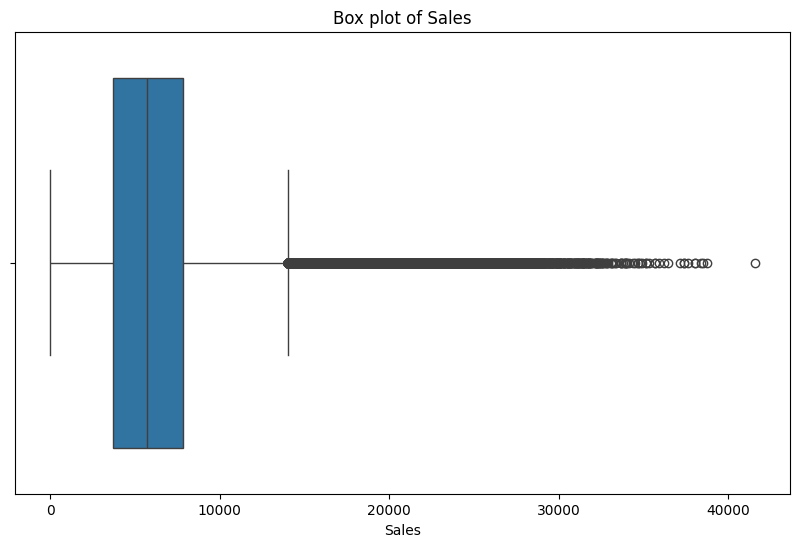

In [8]:
# Step 6: Visualize Outliers Using Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=processor.train['Sales'])
plt.title('Box plot of Sales')
plt.show()

In [9]:
# Count Outliers
try:
    num_outliers = processor.count_outliers()
    print(f"Number of outliers to be removed: {num_outliers}")
except Exception as e:
    print(f"Error counting outliers: {e}")


Number of outliers to be removed: 26694


In [11]:
# so, it is better to keep as it is the original data  without  handling of outliers

Step 7: Merge Data

In [12]:
try:
    processor.merge_data()
except Exception as e:
    print(f"Error merging data: {e}")

2025-01-03 14:32:38,338 - INFO - Merging train and store datasets...


Step 8: Clean Data

In [13]:
try:
    processor.clean_data()
except Exception as e:
    print(f"Error cleaning data: {e}")

2025-01-03 14:32:43,725 - INFO - Handling white spaces...
2025-01-03 14:32:43,728 - INFO - Eliminating duplicates...
2025-01-03 14:32:45,427 - INFO - Checking data types...
2025-01-03 14:32:45,429 - INFO - Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object
2025-01-03 14:32:45,432 - INFO - Id                             int64
Store                          int64
DayOfWe

Step 9: Save Cleaned Data

In [14]:
try:
    processor.save_cleaned_data(train_output_path, test_output_path)
except Exception as e:
    print(f"Error saving cleaned data: {e}")

2025-01-03 14:34:41,343 - INFO - Saving cleaned data...
